In [1]:
from pylab import *
from healpy import *
from py_lognormal_mocks import *

In [3]:
seed(329968)

nside = 512
npix = 12*nside**2

Nl = 768
l = arange(0.,Nl)

# Set up some mean values and power spectra for the fields we want

NobjA = 10000
NobjB = 2000000

rhobarA = float(NobjA)/npix
rhobarB = float(NobjB)/npix
rhobar = array([rhobarA,rhobarB])

print(rhobar)

[0.00317891 0.63578288]


In [4]:
ClA = l**0.5 * exp(-l**2/2./130.**2) *1e-10
ClB = exp(-l**2/2./100.**2) * 1e-9
ClAB = 0.5 * sqrt(ClA * ClB)

Cl = array([[ ClA, ClAB ],[ClAB, ClB]])

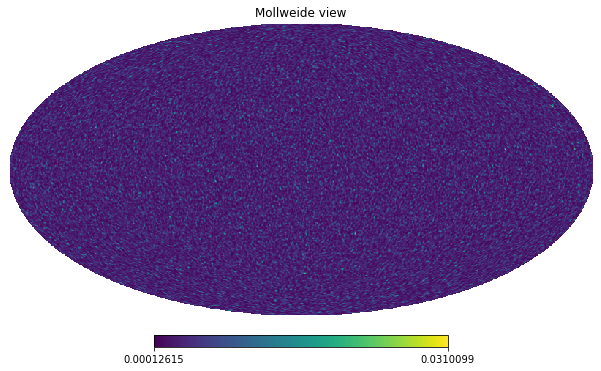

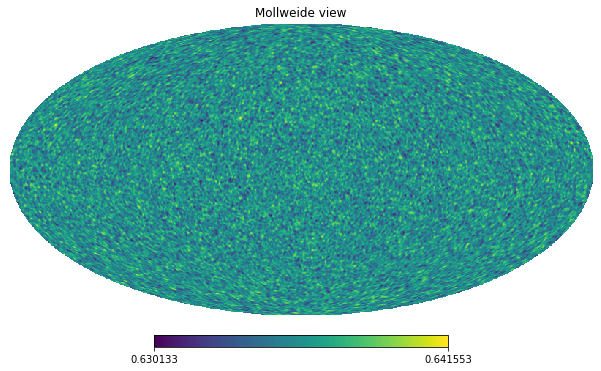

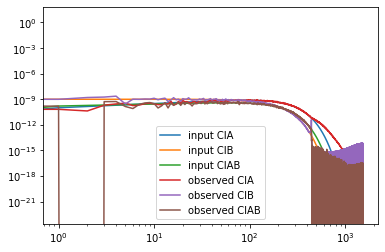

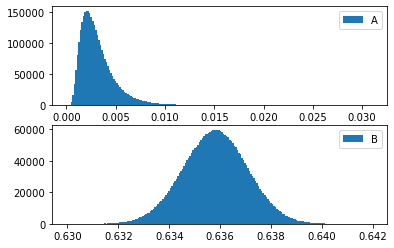

In [5]:
Ntheta = 15000  # The Ntheta parameter controls the accuracy.  Increase for more accurate small scales

gaussbar, Clg = lognormal_mocks_stats(rhobar,Cl,Ntheta)


almg = synalm( (Clg[0,0],Clg[1,1],Clg[1,0]),
                   new=True) # make the gaussianized alms

mAg = alm2map(almg[0],nside)
mBg = alm2map(almg[1],nside)


mA = exp(gaussbar[0] + mAg)
mB = exp(gaussbar[1] + mBg)  # these continuous maps could be poisson sampled to get a realization of e.g. galaxy counts


ClobsA = anafast(mA)
ClobsB = anafast(mB)
ClobsAB = anafast(mA,mB)

close('all')

# You can visually see the correlation between the fields if you blink them.
mollview(mA)
mollview(mB)

# Note the power spectrum goes bad at high ell.  This is because
#   1. The Ntheta parameter runs out of resolution.  It can be increased
#   2. The alms are only synthesized up to a particular lmax.

figure()
plot(ClA,label='input ClA')
plot(ClB,label='input ClB')
plot(ClAB,label='input ClAB')
plot(ClobsA,label='observed ClA')
plot(ClobsB,label='observed ClB')
plot(ClobsAB,label='observed ClAB')
loglog()

legend()

# Because the mean of A is small, the field is notably non-Gaussian.
figure()
subplot(211)
hist(mA,200,label="A")
legend()

# Field B is fairly Gaussian.  You can make zero-mean gaussian fields by setting the mean high, then subtracting it away.
subplot(212)
hist(mB,200,label="B")
legend()
show()